# Individual assignment: more wine!

In this assignment you will work with two datasets of Portuguese red and white wine variants. The data is related to red and white variants of the Portuguese "Vinho Verde" wine.

* Paper: https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c


The columns in the datasets are as follows:

1. fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
4. residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. chlorides: the amount of salt in the wine
6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density: the density of wine is close to that of water depending on the percent alcohol and sugar content
9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. alcohol: the percent alcohol content of the wine

There are two datasets, one for red wine and one for white wine. The goal is to model wine quality.

## Grading

The assignment is graded up to 8 points.

There can be a maximum of 2 points of extra credit, according to the `improvement` percentage in the last question:
* If your hyperparameter tuning improves the model by 5% or more, you get **1 point of extra credit.**
* If it improves the model by 10% or more, you get **2 points of extra credit.**
* If your hyperparameter tuning does not improve the model, you get **0 points of extra credit.**

**The maximum grade is 10 (8 + 2 extra credit if applicable).**

## Question 1 (0.5 points)

Load each dataset as a dataframe and create a new column called `type` with the wine type (red or white, type included in the name of the dataset).

Contatenate the two dataframes into a single dataframe called `wine` and display a sample of 5 rows.

In [25]:
import pandas as pd 
import numpy as np 

w_red= pd.read_csv("winequality-red.csv")
w_white=pd.read_csv("winequality-white.csv")

w_red.shape
w_white.shape

#type_red = "RED"
#w_red.insert(12, "type_wine",[type_red],True)

w_red["Type_wine"]= "Red"
w_white["Type_wine"]="white"

wine = pd.concat([w_red, w_white], ignore_index=True)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


## Question 2  (0.5 points)

I just realized that the column `type`should not be a string, but a categorical column. Change the column `type` to a numerical column and display the first 5 rows.

In [27]:
wine['Type_wine']=wine['Type_wine'].astype('category')
wine['Type_wine']=wine['Type_wine'].cat.codes
wine

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Type_wine                  int8
dtype: object

## Question 3 (1 point)

We need to convert this problem into a classification problem.

Before that, we need a categorical target, and for that we will use the `quality` column. But first, analyze the `quality` column and decide how to convert it into a categorical target.

1. Print the unique values of the `quality` column.
2. Plot a histogram of the `quality` column for each type of wine.
3. Based on the analysis, decide and justify which value will be the threshold to convert the `quality` column into a binary target.
    * For example, if you decide that the threshold is 6, then the target will be 1 if the quality is greater than 6 and 0 otherwise.
    * Don't overthink this, just decide a threshold and justify it.
4. Create a new column called `target` with the binary target, considering the threshold you decided.


In [29]:
wine["quality"].nunique()

7

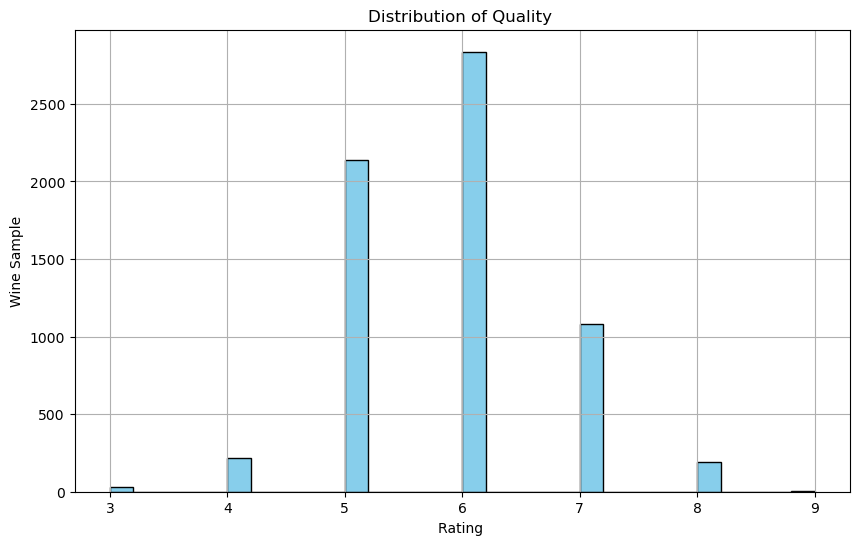

In [31]:
import matplotlib.pyplot as plt

# Assuming 'duration_ms' is a column in your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(wine['quality'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Quality ')
plt.xlabel('Rating ')
plt.ylabel('Wine Sample')
plt.grid(True)
plt.show()

In [33]:
wine['target'] = (wine['quality'] > 6).astype(int)

wine 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_wine,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


## Question 4 (1 point total, 0.25 each new feature)

Let's create some new features.

You have to create 4 new columns in the dataframe `wine`, doesn't matter whether they'll be useful or not, just create them.

Remember, you can use the following operations to create new columns:
* Basic arithmetic operations between columns
* Label encoding of categorical columns
* Binning of numerical columns (convert a continuous variable column into a categorical column)
* Apply a function to a column
...

In [45]:
wine['Citric Acidity'] = ((wine['citric acid']) > 0.5).astype(int)  # if gretaer than 0.5 more citric denoted by 1 
wine['Sulphuric']=(wine['free sulfur dioxide'] > 40).astype(int)  # if gretaer than 40 more free sulphur denoted by 1
wine['SUGAR_surplus'] = ((wine['residual sugar']) > 4.0).astype(int)  # if gretaer than 4.0 more suagr denoted by 1 
wine['NATURE']=(wine['pH'] > 2.5).astype(int)  # if gretaer than 2.5 more pH denoted by 1

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_wine,target,Citric Acidity,Sulphuric,SUGAR_surplus,NATURE
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0,0,0,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0,0,0,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0,0,0,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0,1,0,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,0,0,0,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0,0,1,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,0,0,0,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1,0,0,0,1


## Question 5 (1 point)

Now that we have a target and some new features, we can create a classification model.

But first, we need to remove the `quality` column and split the data into features and target.

1. Remove the `quality` column from the dataframe.
2. Split the data into features and target. Name the features dataframe `x` and the target series `y`.
3. Split the data into training and test sets.
    * Keep in mind the nature of your target, and use stratification if necessary.

In [46]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type_wine               0
target                  0
Citric Acidity          0
Sulphuric               0
SUGAR_surplus           0
NATURE                  0
dtype: int64

In [49]:
wine = wine.drop(['quality'],axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type_wine,target,Citric Acidity,Sulphuric,SUGAR_surplus,NATURE
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,0,0,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0,0,0,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0,0,0,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0,1,0,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,0,0,0,1


In [55]:
X=wine.drop(['target'],axis=1)
y=wine['target']



0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    1
6496    0
Name: target, Length: 6497, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)
x_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type_wine,Citric Acidity,Sulphuric,SUGAR_surplus,NATURE
3069,7.6,0.52,0.49,14.0,0.034,37.0,156.0,0.99580,3.14,0.38,11.800000,1,0,0,1,1
6302,5.9,0.12,0.28,1.4,0.037,36.0,83.0,0.99074,3.33,0.42,10.900000,1,0,0,0,1
2355,5.8,0.25,0.28,11.1,0.056,45.0,175.0,0.99755,3.42,0.43,9.500000,1,0,1,1,1
4978,7.6,0.36,0.49,11.3,0.046,87.0,221.0,0.99840,3.01,0.43,9.200000,1,0,1,1,1
5076,7.6,0.31,0.24,1.8,0.037,39.0,150.0,0.99130,3.05,0.44,11.800000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,7.3,0.28,0.36,12.7,0.040,38.0,140.0,0.99800,3.30,0.79,9.600000,1,0,0,1,1
6253,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,1,0,1,1,1
1931,6.3,0.23,0.30,1.8,0.033,16.0,91.0,0.99060,3.28,0.40,11.800000,1,0,0,0,1
5600,6.4,0.25,0.57,1.0,0.062,21.0,122.0,0.99238,3.00,0.40,9.500000,1,1,0,0,1


In [71]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type_wine,Citric Acidity,Sulphuric,SUGAR_surplus,NATURE
3419,6.8,0.300,0.35,2.8,0.038,10.0,164.0,0.99120,3.09,0.53,12.0,1,0,0,0,1
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,0,0,0,0,1
5340,7.0,0.150,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,1,0,0,1,1
6363,5.9,0.260,0.29,5.4,0.046,34.0,116.0,0.99224,3.24,0.41,11.4,1,0,0,1,1
3916,7.5,0.240,0.62,10.6,0.045,51.0,153.0,0.99779,3.16,0.44,8.8,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,7.8,0.260,0.31,3.6,0.025,22.0,100.0,0.99066,2.99,0.47,12.1,1,0,0,0,1
3508,7.6,0.130,0.34,9.3,0.062,40.0,126.0,0.99660,3.21,0.39,9.6,1,0,0,1,1
4067,5.2,0.160,0.34,0.8,0.029,26.0,77.0,0.99155,3.25,0.51,10.1,1,0,0,0,1
4539,7.1,0.290,0.34,7.8,0.036,49.0,128.0,0.99397,3.21,0.40,10.7,1,0,1,1,1


## Question 6  (0.5 points)

Time for scaling the data.

Choose a scaler and scale the features, properly done.

In [72]:

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(x_train)

x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)
x_train_sc 

array([[ 0.46153846,  1.35294118,  1.2       , ...,  0.        ,
         1.        ,  0.        ],
       [-0.84615385, -1.        , -0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.92307692, -0.23529412, -0.2       , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.53846154, -0.35294118, -0.06666667, ...,  0.        ,
         0.        ,  0.        ],
       [-0.46153846, -0.23529412,  1.73333333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.30769231, -0.35294118,  0.06666667, ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
x_test_sc

array([[-0.15384615,  0.05882353,  0.26666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38461538,  2.32352941, -0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.82352941, -0.2       , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.38461538, -0.76470588,  0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07692308,  0.        ,  0.2       , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.61538462, -0.05882353,  0.06666667, ...,  0.        ,
         1.        ,  0.        ]])

## Question 7  (0.5 points)

Choose a classification algorithm and initialize it.

In [74]:

from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train_sc, y_train)

base_wine_pred = rf.predict(x_test_sc)

f1_rf = f1_score(base_wine_pred, y_test)





## Question 8 (1 point)

Test the model's performance on the test set without any hyperparameter tuning, just to see how it performs.

From now on, the metric used to evaluate the model will be the [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

Print the F1 score of the model evaluated on the test set.

In [75]:
f1_rf

0.6485260770975056

In [76]:
from sklearn.model_selection import GridSearchCV

grid_rf = {
    'n_estimators': [200, 300],
    'max_depth': [10, 50]
}

gs_rf = GridSearchCV(
    estimator=rf,
    param_grid=grid_rf,
    scoring='f1',
    cv=3,
    verbose=2
)

gs_rf.fit(x_train_sc, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.6s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.5s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.5s
[CV] END .....................max_depth=10, n_estimators=300; total time=   0.8s
[CV] END .....................max_depth=10, n_estimators=300; total time=   0.8s
[CV] END .....................max_depth=10, n_estimators=300; total time=   0.8s
[CV] END .....................max_depth=50, n_estimators=200; total time=   0.6s
[CV] END .....................max_depth=50, n_estimators=200; total time=   0.6s
[CV] END .....................max_depth=50, n_estimators=200; total time=   0.6s
[CV] END .....................max_depth=50, n_estimators=300; total time=   0.9s
[CV] END .....................max_depth=50, n_estimators=300; total time=   0.9s
[CV] END .....................max_depth=50, n_est

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50], 'n_estimators': [200, 300]},
             scoring='f1', verbose=2)

## Question 9 (1 point)

Now we have a baseline to beat, let's try to improve the model's performance and also make it robust by using GridSearchCV.

Create a grid with hyperparameters to be tested and use GridSearchCV to find the best hyperparameters.

Use as many hyperparameters as you want, but test at least 3 different values for each hyperparameter. 

Use no less than 3 folds in GridSearchCV.

Be aware of the time it takes to run GridSearchCV, don't use too many hyperparameters or too many values for each hyperparameter.

Use the grid search fitting time to review your answers above.


In [79]:

b_params_rf = gs_rf.best_params_
best_rf = RandomForestClassifier(**b_params_rf)

best_rf.fit(x_train_sc, y_train)

best_pred_rf = best_rf.predict(x_test_sc)


best_f1_rf = f1_score(best_pred_rf, y_test)


0.6531531531531531


## Question 10 (1 point)

Given the best hyperparameters, train you model with them, and test its performance on the test set.
* Print the best hyperparameters found by GridSearchCV.
* Print the F1 score of the freshly trained model evaluated on the test set.
* Print the improvement in the F1 score compared to the baseline model by using the following relation:
    * improvement = 1 - (f1_score_new / f1_score_baseline)
* Save the predictions in a CSV file called `predictions.csv`.

In [80]:
b_params_rf

{'max_depth': 50, 'n_estimators': 300}

In [81]:
best_f1_rf

0.6531531531531531

In [90]:
improvement = (1 - (f1_rf/best_f1_rf))*100
improvement

0.7084212995543071

In [92]:
pd.DataFrame(best_pred_rf).to_csv("preds.csv")